## <font color=blue>Init en Settings voor de profile generatorbar</font>


In [56]:
import numpy as np
import pandas as pd
import time

#Deze lijst is om de execute times uit te kunnen rekenen. Alleen voor debug purposes.
timingList = []

numberOfProfilesToGenerate = int(input("Hoeveel profiles wil je genereren? "))

#Hoe meer kieskeurig het profiel, hoe minder fav ingredienten
pickyRange = [1,0]
while pickyRange[0] > pickyRange[1] or (pickyRange[0] < 0 or pickyRange[0] > 1) or (pickyRange[1] < 0 or pickyRange[1] > 1):
    print("De kieskeurigheid geeft aan hoe kieskeurig de gebruiker is. 0 eet alles en 1 eet niks. (float tussen 0 en 1)")
    pickyRange = [float(input("Kieskeurig min?: ")),float(input("Kieskeurig max?: "))] 
    if pickyRange[0] > pickyRange[1] or (pickyRange[0] < 0 or pickyRange[0] > 1) or (pickyRange[1] < 0 or pickyRange[1] > 1):
        print("Je hebt t gewoon fout gedaan... Het is niet erg hoor, T is gewoon dat ik het jammer vind. Probeer het maar ff op nieuw. ")

#Importeer de lijst van ingredienten hier.
timingList.append(time.time()) #Start timer
RecipeIngredients = pd.read_csv("Benodigde Datasets/ingr_pivot_lunch_diner_noten.csv")
listOfIngredients = list(RecipeIngredients)[1:]
timingList.append(time.time()) #Stop Timer

Hoeveel profiles wil je genereren? 1000
De kieskeurigheid geeft aan hoe kieskeurig de gebruiker is. 0 eet alles en 1 eet niks. (float tussen 0 en 1)
Kieskeurig min?: 0.1
Kieskeurig max?: 0.6


## <font color=blue>Function Declaration </font>

In [57]:
def rtnrList(recipeIngredients, pickyness):
    nrlist = []
    for i in range(len(recipeIngredients)):
        if np.random.uniform(0, 1) < pickyness*1: #only 10% of their pickyness is accounted for
            nrlist.append(i)
    return nrlist

def getFavIngredients(recipeIngredients, pickyness):
    #Create Dictionary with False for all ingredients
    #Indices chosen by random
    indices = rtnrList(recipeIngredients, pickyness)
    #Recipes of chosen indices including ingredients
    FavRecipeIng = recipeIngredients.iloc[indices]
    #Ingredients based on fav recipes in one row
    FavIngredients = FavRecipeIng.iloc[:,1:].sum() != 0
    #All fav recipes in one column
    FavRecipes = FavRecipeIng.iloc[:,0]
    
    #Makes a True and False list from RecipeIngredients and FavRecipes.
    AllRecipeNames = recipeIngredients.iloc[:,0].isin(FavRecipes)
    #Concatinates the names and the booleans together
    datafr = pd.concat([recipeIngredients.iloc[:,0],AllRecipeNames],axis=1)
    #Sets Column names
    datafr.columns = ["Recipe","isin"]
    #Transposes dataset and sets index
    datafr = datafr.set_index("Recipe").transpose()

    return FavIngredients,datafr

## <font color=blue>Data generation </font>

In [58]:
#Creeer een dictionary
timingList.append(time.time()) #Start timer
UserIngredients = pd.DataFrame(dict((i, [],) for i in listOfIngredients)).astype(bool)
UserRecipes = pd.DataFrame(columns=RecipeIngredients.iloc[:,0]).astype(bool)
timingList.append(time.time()) #Stop Timer

#Execute de onderstaande code voor elk persoon.
timingList.append(time.time()) #Start timer
for i in range(numberOfProfilesToGenerate):
    pickyness = np.random.uniform(pickyRange[0], pickyRange[1])
    FavIngr, FavRecipes = getFavIngredients(RecipeIngredients,pickyness)
    UserIngredients = pd.concat([UserIngredients,pd.DataFrame(FavIngr).transpose()],axis=0,ignore_index=True)
    UserRecipes = pd.concat([UserRecipes,pd.DataFrame(FavRecipes)],ignore_index=True)
    
timingList.append(time.time()) #Stop Timer


In [59]:
#Convert it into usable datasets (User favs + Specific Recipe Ingredients)
FinalXDataset = pd.DataFrame(columns=list(UserIngredients.columns)+list(UserRecipes.columns))

print(UserIngredients.iloc[0,:])



for i in range(len(UserRecipes)):
    for o in range(len(UserRecipes.iloc[i,:])):
        value = UserRecipes.iloc[i,o]
        column = UserRecipes.columns[o]
        #if value:
            #print("column: ",column)
            #print("User %i index %i: %i" %(i,o,value))
    

(arachide)olie              True
(herten)biefstukken        False
(houdbare) melk            False
(magere) shoarmareepjes     True
(olijf)olie                 True
                           ...  
zwarte tagliatelle         False
zwarte-peperkorrels         True
zwarteolijvenplakjes        True
zwartepeperkorrel          False
zwijnsteak                  True
Name: 0, Length: 4797, dtype: bool


## <font color=blue>Timing Debug info</font>

In [60]:
timingLabels = ["Loading column dataset", "Dictionary creation", "Generating profile data"]

for i in range(int(len(timingList)/2)):
    print("%s took %.2f seconds! "%(timingLabels[i],timingList[i*2+1]-timingList[i*2]))

Loading column dataset took 3.30 seconds! 
Dictionary creation took 0.06 seconds! 
Generating profile data took 71.74 seconds! 


In [61]:
UserIngredients

,(arachide)olie,(herten)biefstukken,(houdbare) melk,(magere) shoarmareepjes,(olijf)olie,(scharrel)braadworst,(wilde) perzik,(witte) quinoa,(wittewijn)azijn,(zonnebloem)olie,...,zwarte peper,zwarte peperkorrels,zwarte quinoa,zwarte rijst,zwarte sesamzaadje,zwarte tagliatelle,zwarte-peperkorrels,zwarteolijvenplakjes,zwartepeperkorrel,zwijnsteak
0,True,False,False,True,True,True,True,True,False,True,...,True,True,True,True,False,False,True,True,False,True
1,True,False,False,True,True,True,True,False,False,True,...,True,False,True,True,True,False,True,False,True,True
2,True,False,True,True,True,True,True,False,True,True,...,True,True,True,True,True,False,True,False,True,True
3,True,True,False,False,True,True,False,False,False,True,...,True,True,True,False,False,False,True,False,False,True
4,True,True,False,False,True,True,True,True,True,True,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,True,True,True,True,False,True,False,True,...,True,True,True,False,False,True,True,True,True,True
996,True,False,True,False,True,True,False,False,False,True,...,True,True,True,False,True,False,True,False,False,False
997,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,True
998,True,False,False,False,True,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [62]:
UserRecipes

,Andijviestamppot met gebakken salami,Libanese wraps met appel-koolsalade,Plaattaart met gegrilde groenten en witte kaas,Zalmspies met sojaglaze van de BBQ,&amp;Suus’ buik-weg-salade,'Burrito'-schotel met knapperige tortillapuntjes,'Foeyonghai' met bami,'Kapsalon' met&nbsp;vegetarische&nbsp;kipshoarma en salade,'Leeuwenkoppen' van gehakt en kool,'Marokkaanse' lamsbout,...,Zwarte-bonenstoof met feta,Zwartebonen-rijstsalade met avocado &amp; witte kaas,Zwartebonenchili met kip,Zwartebonenstoof met tofu en gordita's,Zweedse balletjes,Zweedse gehaktballetjes,Zweedse gehaktballetjes met room,Zweedse vegaballetjes met aardappel &amp; broccoli,Zwitserse kaasfondue,‘Nasi’ met Hollandse soepgroente
0,True,False,False,False,True,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,True,False,True,False,False,False,True,True,False,True,...,True,False,True,True,False,True,True,True,True,False
2,False,True,True,False,True,False,True,True,False,False,...,False,True,True,False,False,False,True,False,False,False
3,True,False,True,False,True,False,False,True,True,True,...,False,False,True,True,False,True,True,True,False,True
4,False,False,False,True,True,False,False,True,False,False,...,False,False,False,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,True,False,False,False,True,True,True,False,...,False,True,False,False,False,False,True,False,False,True
996,False,True,True,False,False,False,True,True,False,True,...,False,False,True,False,False,False,False,False,False,True
997,True,False,True,False,True,True,False,False,True,True,...,False,True,False,False,True,True,False,True,False,False
998,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
RecipeIngredients.set_index("recipe")

,(arachide)olie,(herten)biefstukken,(houdbare) melk,(magere) shoarmareepjes,(olijf)olie,(scharrel)braadworst,(wilde) perzik,(witte) quinoa,(wittewijn)azijn,(zonnebloem)olie,...,zwarte peper,zwarte peperkorrels,zwarte quinoa,zwarte rijst,zwarte sesamzaadje,zwarte tagliatelle,zwarte-peperkorrels,zwarteolijvenplakjes,zwartepeperkorrel,zwijnsteak
recipe,,,,,,,,,,,,,,,,,,,,,
Andijviestamppot met gebakken salami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Libanese wraps met appel-koolsalade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Plaattaart met gegrilde groenten en witte kaas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zalmspies met sojaglaze van de BBQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&amp;Suus’ buik-weg-salade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zweedse gehaktballetjes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zweedse gehaktballetjes met room,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zweedse vegaballetjes met aardappel &amp; broccoli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Boolean to Int

In [65]:
user_ingredients = UserIngredients*1
user_ingredients.sum()

(arachide)olie             1000
(herten)biefstukken         328
(houdbare) melk             323
(magere) shoarmareepjes     365
(olijf)olie                1000
                           ... 
zwarte tagliatelle          345
zwarte-peperkorrels         805
zwarteolijvenplakjes        317
zwartepeperkorrel           535
zwijnsteak                  350
Length: 4797, dtype: int64

In [66]:
user_recipes = UserRecipes*1
user_recipes.sum()

 Andijviestamppot met gebakken salami                 345
 Libanese wraps met appel-koolsalade                  363
 Plaattaart met gegrilde groenten en witte kaas       343
 Zalmspies met sojaglaze van de BBQ                   350
&amp;Suus’ buik-weg-salade                            365
                                                     ... 
Zweedse gehaktballetjes                               337
Zweedse gehaktballetjes met room                      341
Zweedse vegaballetjes met aardappel &amp; broccoli    353
Zwitserse kaasfondue                                  356
‘Nasi’ met Hollandse soepgroente                      346
Length: 4616, dtype: int64

In [83]:
RecipeIngredients = pd.read_csv("Benodigde Datasets/ingr_pivot_lunch_diner_noten.csv")
RecipeIngredients

,recipe,(arachide)olie,(herten)biefstukken,(houdbare) melk,(magere) shoarmareepjes,(olijf)olie,(scharrel)braadworst,(wilde) perzik,(witte) quinoa,(wittewijn)azijn,...,zwarte peper,zwarte peperkorrels,zwarte quinoa,zwarte rijst,zwarte sesamzaadje,zwarte tagliatelle,zwarte-peperkorrels,zwarteolijvenplakjes,zwartepeperkorrel,zwijnsteak
0,Andijviestamppot met gebakken salami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Libanese wraps met appel-koolsalade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Plaattaart met gegrilde groenten en witte kaas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Zalmspies met sojaglaze van de BBQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,&amp;Suus’ buik-weg-salade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4611,Zweedse gehaktballetjes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4612,Zweedse gehaktballetjes met room,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4613,Zweedse vegaballetjes met aardappel &amp; broc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4614,Zwitserse kaasfondue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Dataset all 
ALL recipes with ALL ingredients and ALL tags

In [1]:
import numpy as np
import pandas as pd

ingr = pd.read_csv('/data/foodboost/ingredients.csv', index_col=0)
nutr = pd.read_csv('/data/foodboost/nutritions.csv', index_col=0)
recp = pd.read_csv('/data/foodboost/recipes.csv', index_col=0)
tags = pd.read_csv('/data/foodboost/tags.csv', index_col=0)

ingr['all_ingredients'] = ingr[['recipe', 'ingredient']].groupby(['recipe'])['ingredient'].transform(lambda x: '|'.join(x))
recp_ingr = ingr.copy()
recp_ingr = recp_ingr[['recipe', 'all_ingredients']]
recp_ingr.drop_duplicates(inplace=True, ignore_index=True)

tags['all_tags'] = tags[['recipe', 'tag']].groupby(['recipe'])['tag'].transform(lambda x: '|'.join(x))
recp_tags = tags.copy()
recp_tags = recp_tags[['recipe','all_tags']]
recp_tags.drop_duplicates(inplace=True, ignore_index=True)

recp_all = pd.merge(recp_ingr, recp_tags[["recipe","all_tags"]] , how= 'outer', left_on='recipe', right_on='recipe')
recp_all

,recipe,all_ingredients,all_tags
0,Kruidnoten met choco-discodip,melkchocolade|kruidnoten|discodip,hollands|gebak|gebak|sinterklaas|sinterklaasavond
1,Kruidnoten in marsepein,blanke marsepein|ongezouten roomboter|kruidnot...,hollands|gebak|gebak|sinterklaas|sinterklaasavond
2,Kruidnoten met chocodips,pure chocolade|ongezouten roomboter|kruidnoten...,hollands|gebak|gebak|sinterklaas|sinterklaasavond
3,Pepernotentaart met marsepeinstrik,ongezouten roomboter|witte basterdsuiker|vanil...,oven|hollands|gebak|gebak|sinterklaas|sinterkl...
4,Perencake,middelgroot ei|Griekse yoghurt 10%|fijne krist...,vooraf te maken|oven|gebak|gebak
...,...,...,...
8701,Paddenstoelen en courgettegratin,witbrood|olijfolie|courgettes|knoflook|paddest...,oven|bijgerecht
8702,Peren-amandelcoupe,verse munt|halve peren op siroop|handpeer|vani...,mediterraan|nagerecht
8703,Ceviche met sint-jakobsschelpen,rode peper|verse gember|limoenen|rode grapefru...,voorgerecht
8704,Pittige truffels,rode peper|chocolade extra puur 72%|verse slag...,glutenvrij|oven|gebak|gebak|nagerecht


# Desired Columns
Make list of all recipes containing certain tag (example: 'chinees')

In [3]:
#kies een sublieme tag uit deze sublieme lijst
len(np.sort(tags['tag'].unique()))

118

In [8]:
recp_small = recp_all[recp_all['all_tags'].str.contains('|'.join(['aziatisch','italiaans']), na=False)]
list_small = list(recp_small['recipe'])
recp_small['all_ingredients']

5       koelverse sereh citroengras|kokosmelk|water|la...
8       limoen|scharrel kippenpoten naturel|zout|sjalo...
15      verse sperziebonen|sjalot|knoflook|verse laosw...
16      scharrel kipfilet|middelgroot ei|zout|sherry f...
17      trostomaat|mozzarella|salade-ui|spaghetti|Vege...
                              ...                        
8685    ui|traditionele olijfolie|tomatenblokjes|halfv...
8686    volkoren penne rigate|verse spinazie|pastasaus...
8688    magere spekreepjes|prei|risottorijst|groentebo...
8690    basmatirijst|zonnebloemolie|Thaise kipfiletblo...
8691    spaghetti|courgette|cherrytomaten|traditionele...
Name: all_ingredients, Length: 1892, dtype: object

In [69]:
user_recipes_small = user_recipes.loc[:,user_recipes.columns.str.contains('|'.join(list_small))]
user_recipes_small

,'Foeyonghai' met bami,'Leeuwenkoppen' van gehakt en kool,Babi pangang,Babi pangang express,Bami met paksoi en omelet,Bami met verse gember,Bami met zoete puntpaprika,Biefstukreepjes met komijn en paprika,Chinese balletjes in zoetzure saus,Chinese chow mein met garnalen,...,Koolsoep met varkensreepjes,Kung po beef,"Noedels met tofu, Chinese wokgroente en zoete chilisaus",Noedelsoep met Shanghai paksoi en kip,Oesterzwammen met gestoofde kip,Roerbak van asperges en garnalen,Sesam-hoisinkip met broccoli,Tjap tjoy kip,Zalmloempia's,Zoetzuur varkensvlees met sesam-radijs
0,0,0,0,1,0,0,0,0,0,1,...,1,1,1,0,1,1,1,1,0,1
1,1,0,0,1,1,1,1,0,1,0,...,0,1,1,1,1,0,0,0,0,0
2,1,0,0,1,1,1,1,0,0,0,...,0,0,1,1,1,0,1,1,1,1
3,0,1,1,1,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,1,0,1,1,...,0,1,0,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,0,1,0,1,1,0,1,1,...,1,1,1,0,0,1,0,1,1,1
996,1,0,1,0,1,0,1,1,1,0,...,1,1,1,0,0,0,1,0,0,1
997,0,1,1,1,1,0,0,1,1,0,...,1,0,1,1,1,1,1,1,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# KNN-Classifier plot

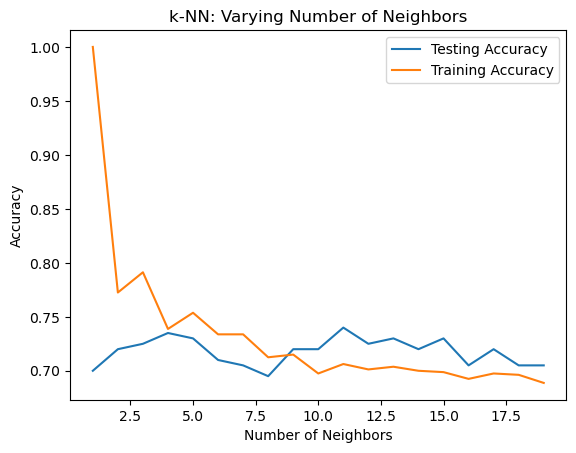

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y = user_recipes_small['Koe loe kai '].values
X = user_recipes_small.drop('Koe loe kai ', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=36)

#knn = KNeighborsClassifier(n_neighbors=1)
#knn.fit(X_train, y_train)

#print(knn.score(X_test, y_test))

neighbor_amount = np.arange(1, 20)
train_accuracy = np.empty(len(neighbor_amount))
test_accuracy = np.empty(len(neighbor_amount))

for i, n in enumerate(neighbor_amount):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbor_amount, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbor_amount, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#y_pred = knn.predict(X)

# KNN Classifier Prediction Evaluation

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y = user_recipes['Koe loe kai '].values
X = user_recipes.drop('Koe loe kai ', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=36)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[130   7]
 [ 49  14]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.82       137
           1       0.67      0.22      0.33        63

    accuracy                           0.72       200
   macro avg       0.70      0.59      0.58       200
weighted avg       0.71      0.72      0.67       200



# KNN Classifier Hyperparameter Tuning
With GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

param_grid = {'n_neighbors': np.arange(1,50)}

y = user_recipes['Koe loe kai '].values
X = user_recipes.drop('Koe loe kai ', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=36)

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 9}
0.68625


# KNN Classifier 2

In [13]:
df = pd.read_csv("Benodigde Datasets/ingr_pivot_lunch_diner_noten.csv").set_index("recipe")
ingr = pd.read_csv('/data/foodboost/ingredients.csv', index_col=0)
nutr = pd.read_csv('/data/foodboost/nutritions.csv', index_col=0)
recp = pd.read_csv('/data/foodboost/recipes.csv', index_col=0)
tags = pd.read_csv('/data/foodboost/tags.csv')

#Get rid of ingredients that aren't used at least 40 times.
ValidColumns = df.loc[:,df.sum() > 40][df.sum(axis=1) != 0]

In [14]:
recepten = list(df.columns)
tags = tags[tags['recipe'].str.contains('|'.join(recepten))]
tags_pivot = tags.pivot_table(values="recipe", index= tags.recipe, columns="tag", aggfunc="count")
tags_pivot= tags_pivot.fillna(0) 
tags_ValidColumns = tags_pivot.loc[:,tags_pivot.sum() > 20][tags_pivot.sum(axis=1) != 0]
tags_ValidColumns

/tmp/ipykernel_22050/1601361395.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tags = tags[tags['recipe'].str.contains('|'.join(recepten))]


tag,5-ingrediënten,amerikaans,aziatisch,bakken,barbecue,bijgerecht,biologisch,borrel,borrelhapje,brood/sandwiches,...,veganistisch,vegetarisch,verjaardag,vooraf te maken,voorgerecht,wat eten we vandaag,wrap,zonder vlees,zonder vlees/vis,zuid-amerikaans
recipe,,,,,,,,,,,,,,,,,,,,,
Andijviestamppot met gebakken salami,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Bietensoep met selderijroom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Libanese wraps met appel-koolsalade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Plaattaart met gegrilde groenten en witte kaas,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Sticky cauliflower (gegrilde bloemkoolroosjes) van Jord Althuizen,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zweedse gehaktballetjes,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zweedse gehaktballetjes met room,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zweedse vegaballetjes met aardappel &amp; broccoli,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
keukens = ['amerikaans','aziatisch','chinees','engels','frans','grieks','hollands','indiaas','indonesisch','italiaans', 'japans','marokkaans','mediterraan', 'mexicaans', 'midden-oosters','scandinavisch','spaans','thais','zuid-amerikaans']
df1 = tags_ValidColumns[keukens]
df1["sum"] = df1[keukens].sum(axis = 1)
df1=df1[df1["sum"] == 1]

tags2 = tags[tags['tag'].str.contains('|'.join(keukens))]
recepten_1_tag = list(df1.index)
tags2 = tags2[tags2['recipe'].isin(recepten_1_tag)]
tags2 = tags2.iloc[:,1:]
tags2.sort_values('recipe')

/tmp/ipykernel_22050/3348406498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["sum"] = df1[keukens].sum(axis = 1)


,recipe,tag
31841,Andijviestamppot met gebakken salami,hollands
13996,'Burrito'-schotel met knapperige tortillapuntjes,zuid-amerikaans
108,'Kapsalon' met&nbsp;vegetarische&nbsp;kipshoar...,hollands
39543,'Pho' met mihoen en ribeye,aziatisch
20439,'Spaanse' surf &amp; turfspiesjes met pittige ...,spaans
...,...,...
42961,Zweedse balletjes,scandinavisch
40502,Zweedse broodsalade,scandinavisch
45948,Zweedse gehaktballetjes,scandinavisch
25071,Zweedse gehaktballetjes met room,scandinavisch


In [24]:
df_minder = df.loc[:,df.sum() > 40][df.sum(axis=1) != 0]
df_final = pd.merge(tags2, df_minder, how= 'inner',left_on= 'recipe', right_on = 'recipe')
df_final

,recipe,tag,(arachide)olie,(olijf)olie,Franse mosterd,Griekse yoghurt,Japanse sojasaus,Parmezaanse kaas,Parmigiano Reggiano,Pecorino Romano (kaas),...,water,winterpeen,witlof,witte kaas 45+,witte rijst,zilvervliesrijst,zoete aardappel,zoete chilisaus,zonnebloemolie,zout
0,Pasta pesto met kipstuckjes en tomatensalade,italiaans,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Hutspot met vegetarische rookworst en jus,hollands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Zoete aardappelstamppot met spruiten en vega g...,hollands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,'Kapsalon' met&nbsp;vegetarische&nbsp;kipshoar...,hollands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Gebakken krieltjes met broccoli en vegetarisch...,hollands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,Ovenpasta met tomaat,italiaans,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1838,Ovenpasta met ei,italiaans,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1839,Ratatouille met kabeljauwfilet,frans,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1840,Ovenrisotto met spek en prei,italiaans,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
